# Exploration of the Olist Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
customers = pd.read_csv('olist_dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_dataset/olist_orders_dataset.csv')
products = pd.read_csv('olist_dataset/olist_products_dataset.csv')
sellers = pd.read_csv('olist_dataset/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('olist_dataset/product_category_name_translation.csv')

## Customers Dataset

In [4]:
customers.dtypes # Checking the data types of the customers dataset

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
customers.head() # Display the first few rows of the customers dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.info() # Get information about the customers dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers['customer_id'].nunique() # Count unique customer IDs

99441

In [8]:
customers['customer_unique_id'].nunique() # Count unique customer unique IDs

96096

In [9]:
duplicate_customers = customers[customers['customer_unique_id'].duplicated(keep=False)]
duplicate_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [10]:
duplicate_customers['customer_unique_id'].value_counts() # Count the number of duplicates for each unique ID

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
941590fb8aef66b3a8352fe7c691879e     2
9ccfff93c79f3dd996cce15f26480c5b     2
801b53359d2880a9bff63574103fb74c     2
cb5c545d96f39390b7f372aaa88c4a7e     2
da29b8a3970adddb9ed2dc8a492065af     2
Name: count, Length: 2997, dtype: int64

In [11]:
customers[customers['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


In [16]:
customers[customers['customer_unique_id'] == 'd44ccec15f5f86d14d6a2cfa67da1975']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
45851,844a7e5d2737f2f6667a5242486cbcb1,d44ccec15f5f86d14d6a2cfa67da1975,3533,sao paulo,SP
57951,105e31e3b36d904c70058578126c4d12,d44ccec15f5f86d14d6a2cfa67da1975,62800,aracati,CE
83347,488dd91f70d8404b2aa677cdc8a0de68,d44ccec15f5f86d14d6a2cfa67da1975,88371,navegantes,SC


In [ ]:
# Check for duplicates with differing values in specified columns
diff_values = duplicate_customers.groupby('customer_unique_id').nunique()
diff_counts = diff_values[(diff_values['customer_zip_code_prefix'] > 1) | 
                          (diff_values['customer_city'] > 1) | 
                          (diff_values['customer_state'] > 1)]

# Display the count of such customers
len(diff_counts)

252

In [ ]:
diff_counts.sort_values('customer_zip_code_prefix', ascending=False).head(10) # Display the first 10 rows of the filtered DataFrame

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
3e43e6105506432c953e165fb2acf44c,9,3,1,1
d44ccec15f5f86d14d6a2cfa67da1975,3,3,3,3
b9badb100ff8ecc16a403111209e3a06,3,3,2,2
9832ae2f7d3e5fa4c7a1a06e9551bc61,3,3,2,1
018b5a7502c30eb5f230f1b4eb23a156,2,2,1,1
031ea691b99fc101dcad357d1a83573f,2,2,1,1
0451ef5a31cea3e14ce02d768d7c9943,2,2,1,1
08fb46d35bb3ab4037202c23592d1259,2,2,2,1
09d74edf20acb4f9523fb1cf19a18456,2,2,2,1


In [ ]:
customers['customer_state'].nunique() # Count the number of customers in each state

27

In [ ]:
customers['customer_state'].value_counts() # Count the number of customers in each state

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'SP'),
  Text(1, 0, 'RJ'),
  Text(2, 0, 'MG'),
  Text(3, 0, 'RS'),
  Text(4, 0, 'PR'),
  Text(5, 0, 'SC'),
  Text(6, 0, 'BA'),
  Text(7, 0, 'DF'),
  Text(8, 0, 'ES'),
  Text(9, 0, 'GO'),
  Text(10, 0, 'PE'),
  Text(11, 0, 'CE'),
  Text(12, 0, 'PA'),
  Text(13, 0, 'MT'),
  Text(14, 0, 'MA'),
  Text(15, 0, 'MS'),
  Text(16, 0, 'PB'),
  Text(17, 0, 'PI'),
  Text(18, 0, 'RN'),
  Text(19, 0, 'AL'),
  Text(20, 0, 'SE'),
  Text(21, 0, 'TO'),
  Text(22, 0, 'RO'),
  Text(23, 0, 'AM'),
  Text(24, 0, 'AC'),
  Text(25, 0, 'AP'),
  Text(26, 0, 'RR')])

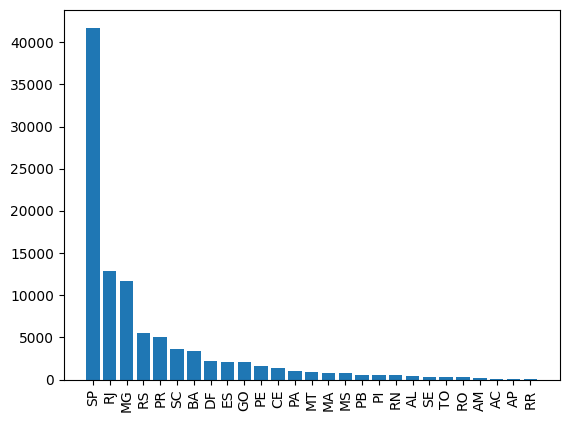

In [ ]:
names = customers['customer_state'].value_counts().index
heights = customers['customer_state'].value_counts()

plt.bar(names, heights)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'sao paulo'),
  Text(1, 0, 'campinas'),
  Text(2, 0, 'guarulhos'),
  Text(3, 0, 'sao bernardo do campo'),
  Text(4, 0, 'santo andre'),
  Text(5, 0, 'osasco'),
  Text(6, 0, 'santos'),
  Text(7, 0, 'sao jose dos campos'),
  Text(8, 0, 'sorocaba'),
  Text(9, 0, 'jundiai'),
  Text(10, 0, 'ribeirao preto'),
  Text(11, 0, 'barueri'),
  Text(12, 0, 'mogi das cruzes'),
  Text(13, 0, 'piracicaba'),
  Text(14, 0, 'sao jose do rio preto'),
  Text(15, 0, 'carapicuiba'),
  Text(16, 0, 'maua'),
  Text(17, 0, 'praia grande'),
  Text(18, 0, 'taboao da serra'),
  Text(19, 0, 'diadema')])

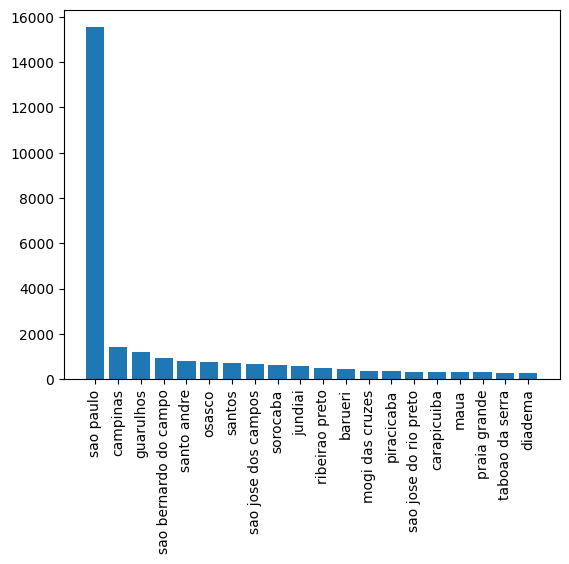

In [ ]:
names = customers[customers['customer_state']=="SP"]['customer_city'].value_counts().head(20).index
heights = customers[customers['customer_state']=="SP"]['customer_city'].value_counts().head(20)

plt.bar(names, heights)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'sao paulo'),
  Text(1, 0, 'rio de janeiro'),
  Text(2, 0, 'belo horizonte'),
  Text(3, 0, 'brasilia'),
  Text(4, 0, 'curitiba'),
  Text(5, 0, 'campinas'),
  Text(6, 0, 'porto alegre'),
  Text(7, 0, 'salvador'),
  Text(8, 0, 'guarulhos'),
  Text(9, 0, 'sao bernardo do campo'),
  Text(10, 0, 'niteroi'),
  Text(11, 0, 'santo andre'),
  Text(12, 0, 'osasco'),
  Text(13, 0, 'santos'),
  Text(14, 0, 'goiania'),
  Text(15, 0, 'sao jose dos campos'),
  Text(16, 0, 'fortaleza'),
  Text(17, 0, 'sorocaba'),
  Text(18, 0, 'recife'),
  Text(19, 0, 'florianopolis')])

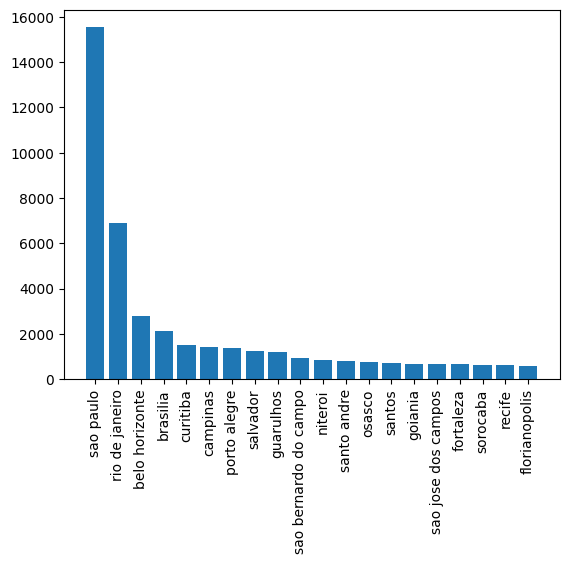

In [ ]:
names = customers['customer_city'].value_counts().head(20).index
heights = customers['customer_city'].value_counts().head(20)

plt.bar(names, heights)

plt.xticks(rotation=90)

In [ ]:
customers[customers['customer_city'] == 'brasilia']['customer_state'].value_counts() # Count the number of customers in Rio de Janeiro by state

customer_state
DF    2131
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'porto alegre'),
  Text(1, 0, 'caxias do sul'),
  Text(2, 0, 'canoas'),
  Text(3, 0, 'santa maria'),
  Text(4, 0, 'pelotas'),
  Text(5, 0, 'rio grande'),
  Text(6, 0, 'novo hamburgo'),
  Text(7, 0, 'passo fundo'),
  Text(8, 0, 'gravatai'),
  Text(9, 0, 'sao leopoldo'),
  Text(10, 0, 'viamao'),
  Text(11, 0, 'cachoeirinha'),
  Text(12, 0, 'bage'),
  Text(13, 0, 'santa cruz do sul'),
  Text(14, 0, 'erechim'),
  Text(15, 0, 'bento goncalves'),
  Text(16, 0, 'ijui'),
  Text(17, 0, 'alvorada'),
  Text(18, 0, 'lajeado'),
  Text(19, 0, 'uruguaiana')])

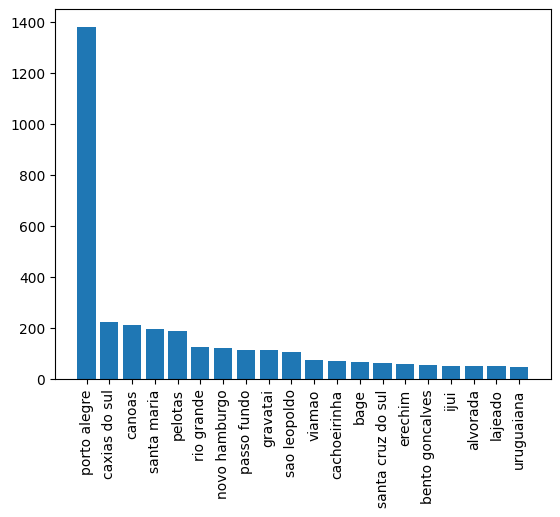

In [ ]:
names = customers[customers['customer_state']=="RS"]['customer_city'].value_counts().head(20).index
heights = customers[customers['customer_state']=="RS"]['customer_city'].value_counts().head(20)

plt.bar(names, heights)

plt.xticks(rotation=90)

## Orders Dataset

In [ ]:
orders.head() # Display the first few rows of the orders dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info() # Get information about the orders dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders['order_id'].nunique() # Count unique order IDs

99441

In [ ]:
orders['customer_id'].nunique() # Count unique customer IDs

99441

### Combine orders and customers
These datasets have a 1-1 mapping on customer_id

In [ ]:
orders = orders.merge(customers, on='customer_id', how='left') # Merge orders with customers dataset

In [ ]:
orders.head() # Display the first few rows of the merged dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
orders.groupby('customer_unique_id')['order_id'].nunique().sort_values(ascending=False) # Count the number of orders per customer

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
ffeefd086fc667aaf6595c8fe3d22d54     1
ffef0ffa736c7b3d9af741611089729b     1
fff1afc79f6b5db1e235a4a6c30ceda7     1
fff1bdd5c5e37ca79dd74deeb91aa5b6     1
fff22793223fe80c97a8fd02ac5c6295     1
Name: order_id, Length: 96096, dtype: int64

order_id -> unique -> autogenerated

customer_unique_id -> not unique in dataset, but represents the same customer every time

customer_id -> unique per order -> multiple customer ids can belont to a single customer 